# The Thermal Expansion of MgO - Lattice Dynamics

In this part of the lab we will optimise the structure (volume) of the MgO crystal by using its free energy and see how this varies with the temperature.<br>
You will need to input the converged grid size from the provious exercise.
Change the temperature (T) from 0K using 100K intervals. You can do this by changing the value of "T" in the script below or you could use a "for loop", like in the previous exercise. GULP does not calculate the expansion of MgO for temperatures higher than 3000K.
<br><br>

In [6]:
from ase.calculators.gulp import GULP
import matplotlib.pyplot as plt
from math import ceil
from ase.spacegroup import crystal
import numpy as np
import re

T_range = np.arange(0,3000,100) 
# USE THE CONVERGED GRID SIZE FROM THE PREVIOUS EXERCISE
k = 16

#we can start from a geometry that is close to the optimised one since we are
#going to optimise it again taking into account the effect of temperature
a = 4
MgO_LD = crystal('MgO',basis=[[0.0,0.0,0.0],[0.5,0.5,0.5]],spacegroup=225,cellpar=[a, a, a, 90, 90, 90],primitive_cell=True)
for T in T_range:
#the name of the calculation including the T
    label='mgo_LD_{}'.format(T)

#setting the options fot the LD calculation
    options = ['shrink {} {} {}'.format(k, k, k), 'temperature {}'.format(T)]
    calc = GULP(label=label ,keywords='conp opti free_energy', library='ionic.lib', options=options)
    opt = calc.get_optimizer(MgO_LD)
    opt.run(fmax=0.05)
#look for the optimised volume in the output
    for line in reversed(list(open(label+'.got'))):
        m = re.match(r'\s*\S+\s*cell volume =\s*(\S+)\s*\S+', line)
        if m:
            volume_f = float(m.group(1))
            break
#look for the free energy in the output
    first_match_found = False
    with open(label+'.got') as o:
        lines = o.readlines()
    for i,line in enumerate(lines):
        if line.find('  Total free energy          =         -') != -1:
            free_energy_LD = line.split()[4]
            if first_match_found:
                break
            else:
                first_match_found = True
    
    print('Gibbs free energy ({} K)  ='.format(T),free_energy_LD,'eV/(Unit cell)')
    print('Volume of the unit cell ({} K)  ='.format(T),volume_f,'Angstrom^3/(Unit cell)')

Gibbs free energy (0 K)  = -40.90190630 eV/(Unit cell)
Volume of the unit cell (0 K)  = 18.83646 Angstrom^3/(Unit cell)
Gibbs free energy (100 K)  = -40.90241964 eV/(Unit cell)
Volume of the unit cell (100 K)  = 18.838231 Angstrom^3/(Unit cell)
Gibbs free energy (200 K)  = -40.90937708 eV/(Unit cell)
Volume of the unit cell (200 K)  = 18.856162 Angstrom^3/(Unit cell)
Gibbs free energy (300 K)  = -40.92812427 eV/(Unit cell)
Volume of the unit cell (300 K)  = 18.88998 Angstrom^3/(Unit cell)
Gibbs free energy (400 K)  = -40.95859358 eV/(Unit cell)
Volume of the unit cell (400 K)  = 18.932453 Angstrom^3/(Unit cell)
Gibbs free energy (500 K)  = -40.99943521 eV/(Unit cell)
Volume of the unit cell (500 K)  = 18.980046 Angstrom^3/(Unit cell)
Gibbs free energy (600 K)  = -41.04931455 eV/(Unit cell)
Volume of the unit cell (600 K)  = 19.031143 Angstrom^3/(Unit cell)
Gibbs free energy (700 K)  = -41.10711819 eV/(Unit cell)
Volume of the unit cell (700 K)  = 19.084962 Angstrom^3/(Unit cell)
Gibbs 

**Questions**:<br>
1. Describe your results:
    - Plot the free energy against temperature<br>
    - Plot the lattice constant against temperature<br>
    - Comment on the shape of these curves.<br>
<br>
2. Compute the coefficient of thermal expansion for MgO<br>
    - How does this compare to that measured? Find a measurement in the literature or on the web.<br>
    - At what temperature was the measurement made?<br>
    - What are the main approximations in your calculation?<br>
    - As the temperature approaches the melting point of MgO how well do the phonon modes represent the actual motions of the ions?<br>
<br>

3. Why does a solid expand when we are using the quasi-harmonic approximation and not with the harmonic approximation?<br>
    <br>
4. What is the physical origin of thermal expansion?<br>

<br>

Populating the interactive namespace from numpy and matplotlib


Text(0,0.5,'Gibbs Free Energy /eV/(Unit cell)')

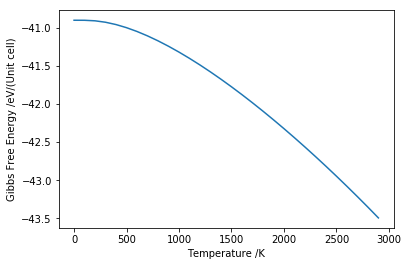

In [3]:
%pylab inline
G=[-40.90190630,-40.90241964,-40.90937708, -40.92812427, -40.95859358, 
   -40.99943521, -41.04931455, -41.10711819, -41.17189069, -41.24301683, 
   -41.31984692, -41.40189070, -41.48873844, -41.58004404, -41.67551241,
   -41.77489002, -41.87795764, -41.98452482, -42.09442570, -42.20751569,
   -42.32366916, -42.44277763, -42.56474882, -42.68950629, -42.81699011,
   -42.94715888, -43.07999424, -43.21551070, -43.35355345, -43.49478246]
T=[0,100,200,300,400,500,600,700,800,900,1000,1100,1200,1300,1400,1500,1600,1700,1800,1900,2000,2100,2200,2300,2400,2500,2600,2700,2800,2900]
plt.plot(T,G)
plt.xlabel('Temperature /K')
plt.ylabel('Gibbs Free Energy /eV/(Unit cell)')

In [4]:
a3=[18.83646, 18.838231, 18.856162, 18.88998, 18.932453,
    18.980046, 19.031143, 19.084962, 19.141205, 19.1995,
    19.25986, 19.322305, 19.387173, 19.454059, 19.523336,
    19.595184, 19.66983, 19.747549, 19.828679, 19.913637,
    20.002943, 20.097259,20.197442, 20.304633, 20.420411,
    20.547053, 20.688043,20.851781, 21.04992, 21.319006]
a=np.array(a3)**(1/3)

Text(0,0.5,'Lattice Parameter /Å/(Unit Cell)')

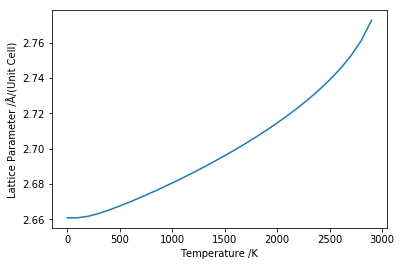

In [5]:
plt.plot(T,a)
plt.xlabel('Temperature /K')
plt.ylabel('Lattice Parameter /Å/(Unit Cell)')

Text(0,0.5,'Volume /Å^3/(Unit Cell)')

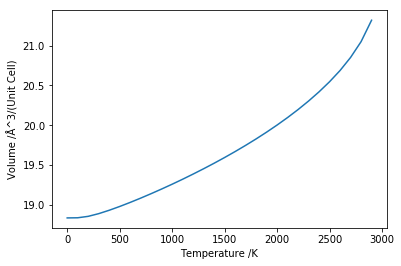

In [7]:
plt.plot(T,a3)
plt.xlabel('Temperature /K')
plt.ylabel('Volume /Å^3/(Unit Cell)')

In [43]:
from scipy import interpolate

spl = interpolate.splrep(T,a3)
small_t = arange(1200-5,1200+5)
fa = interpolate.splev(1200,spl,der=0)     # f(a)
fprime = interpolate.splev(1200,spl,der=1) # f'(a)

In [44]:
alpha = fprime/18.83646
alpha

3.49820494469989e-05